
# Langtjern TOC interpolation at outlet

## Required python libraries and files, setup variables

In [1]:
import sys
import LangtjernWeather as lw
import numpy as np
import datetime
import pandas as pd
import getpass
import matplotlib
import matplotlib.pyplot as plt
import getpass
import itertools as IT
from itertools import compress
from matplotlib import rc
import shutil
import os
import re
import pickle
import pylab
import statsmodels.api as sm
from patsy import dmatrices

#Setting matplotlib style
matplotlib.style.use('ggplot')
%matplotlib inline
pd.options.mode.chained_assignment = None
rc('text', usetex=True)
rc('xtick', labelsize = 16)
rc('ytick', labelsize = 16)
rc('font', size = 16)
#login function
def login():
    username = input("Username: [JLG] ") #default username JLG
    if not username :
        username = "JLG"
    password = getpass.getpass('Password: ')
    return username, password

#Creating directories to store files. This will overwrite if the directory already exists
def create_dir(dir_name) :
    if not os.path.exists(dir_name) :
        os.makedirs(dir_name)
    else :
        shutil.rmtree(dir_name)
        os.makedirs(dir_name)
#Helper function for plotting
def plot_df(df) :
    num_cols = len(df.columns)
    fig, axes = plt.subplots(nrows = num_cols, ncols = 1, figsize = (20, num_cols * 5))
    for name,ax_h in zip(df.columns, axes) :
        plt.sca(ax_h)
        plt.plot(df.index,df[name])
        #df[name].plot(ax = ax_h)
        ax_h.set_ylabel(name)
    return fig
    

#Sanity check
print("Using python version:")
print(sys.version)
print("Paths to python libraries:")
print(sys.path)

#Creating directory to save results
result_dir = './results/'
create_dir(result_dir)    

Using python version:
3.6.3 (default, Oct  3 2017, 21:45:48) 
[GCC 7.2.0]
Paths to python libraries:
['', '/home/jose-luis/Envs/prognos_get_data_py3/lib/python36.zip', '/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6', '/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6/site-packages', '/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6/site-packages/IPython/extensions', '/home/jose-luis/.ipython']


## Asking for credentials to AquaMonitor.

In [2]:
username,password = login()

#Folder where the downloaded data will be saved
root = "./DownloadedData/"
create_dir(root)

Username: [JLG]  
Password:  ··············


## Defining period to download

In [3]:
## Defining period to download

#Setting up date to load data

fromDate = "1970/01/01"
toDate = "2019/01/17"


## Loading data at outlet

In [4]:
chemistry = lw.getLangtjernData(username,password,root,fromDate,toDate, 37928, 'Water')
#del password
chemistry.drop(['Depth1', 'Depth2','ProjectId', 'ProjectName', 'StationId', 'StationCode',
                'StationName','SampleDate_dato', 'SampleDate_tid'], inplace=True, axis=1) 
chemistry.replace('< 1','Null')
chemistry = chemistry.rename(columns=lambda x: re.sub('[_/]',' ',x))
chemistry = chemistry.astype('float64',errors='ignore')
print("The data that were read are: {}".format(chemistry.columns))

/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (28,43,77) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


The data that were read are: Index(['Al µg l', 'Al IL µg l', 'Al L µg l', 'Al R µg l', 'Alk mmol l',
       'Alk 4.5 mmol l', 'ANC µEkv L', 'As µg l', 'Au µg l', 'B µg l',
       'Ba µg l', 'Be µg l', 'Br µg l', 'Ca mg L', 'Cd µg l', 'Ce µg l',
       'Cl mg L', 'Co µg l', 'Cr µg l', 'Cu mg l', 'DOC mg L C', 'Dy µg l',
       'Er µg l', 'Eu µg l', 'F mg l', 'Farge mg Pt l', 'Fe µg l', 'Ga µg l',
       'Gd µg l', 'Hf µg l', 'Hg ng l', 'Ho µg l', 'I µg l', 'Ir µg l',
       'K mg L', 'KlfA µg l', 'KOND20 µS cm', 'Konduktivitet mS m', 'La µg l',
       'Li µg l', 'Lu µg l', 'Mg mg L', 'Mn µg l', 'Mo µg l', 'Na mg L',
       'Nb µg l', 'Nd µg l', 'NH4-N µg l', 'Ni µg L', 'NO3+NO2-N µg l',
       'NO3-N µg l', 'Os µg l', 'P µg l', 'Pb mg l', 'PCB52 ng l', 'Pd µg l',
       'pH', 'PO4-P µg l', 'Pr µg l', 'Pt µg l', 'Ru µg l', 'S µg l',
       'Sb µg l', 'Se µg l', 'SiO2 mg l', 'Sm µg l', 'Sn µg L', 'SO4 mg L',
       'SO4 Old mg l', 'Sr µg l', 'Tb µg l', 'Te µg l', 'Th µg l', 'Tl µg l',
   

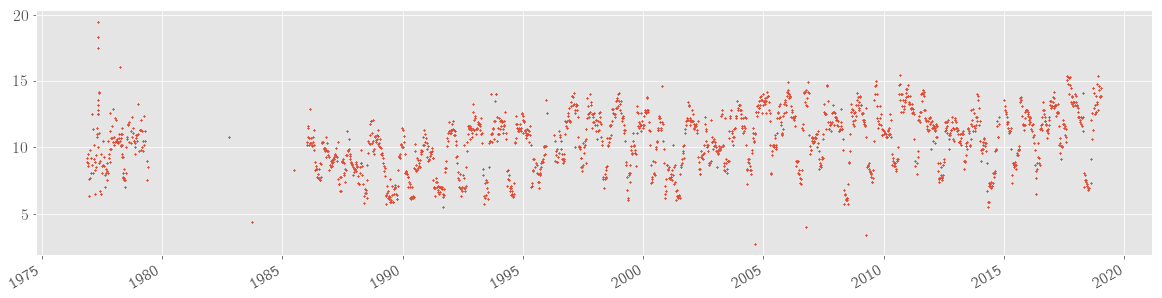

In [5]:
chemistry['TOC mg l'].plot(subplots=True,figsize=(20,5),linestyle='None',marker='.',markersize=1)
TOC=chemistry['TOC mg l']

## Getting CDOM

In [6]:
outlet = lw.getLangtjernData(username,password,root,fromDate,toDate, 51356, 'Water')
outlet.drop(['Depth1', 'Depth2','ProjectId', 'ProjectName', 'StationId', 'StationCode',
             'StationName','SampleDate_dato', 'SampleDate_tid'], inplace=True, axis=1) 
outlet = outlet.rename(columns=lambda x: re.sub('[_/]',' ',x))
outlet = outlet.rename(columns=lambda x: re.sub('µ','u',x))
print("The data that were read are: {}".format(outlet.columns))

The data that were read are: Index(['CDOM ug L', 'CO2 ppm', 'Konduktivitet mS m', 'pH', 'Temperatur C',
       'Vannstand m'],
      dtype='object')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facf78e0d30>,
      dtype=object)

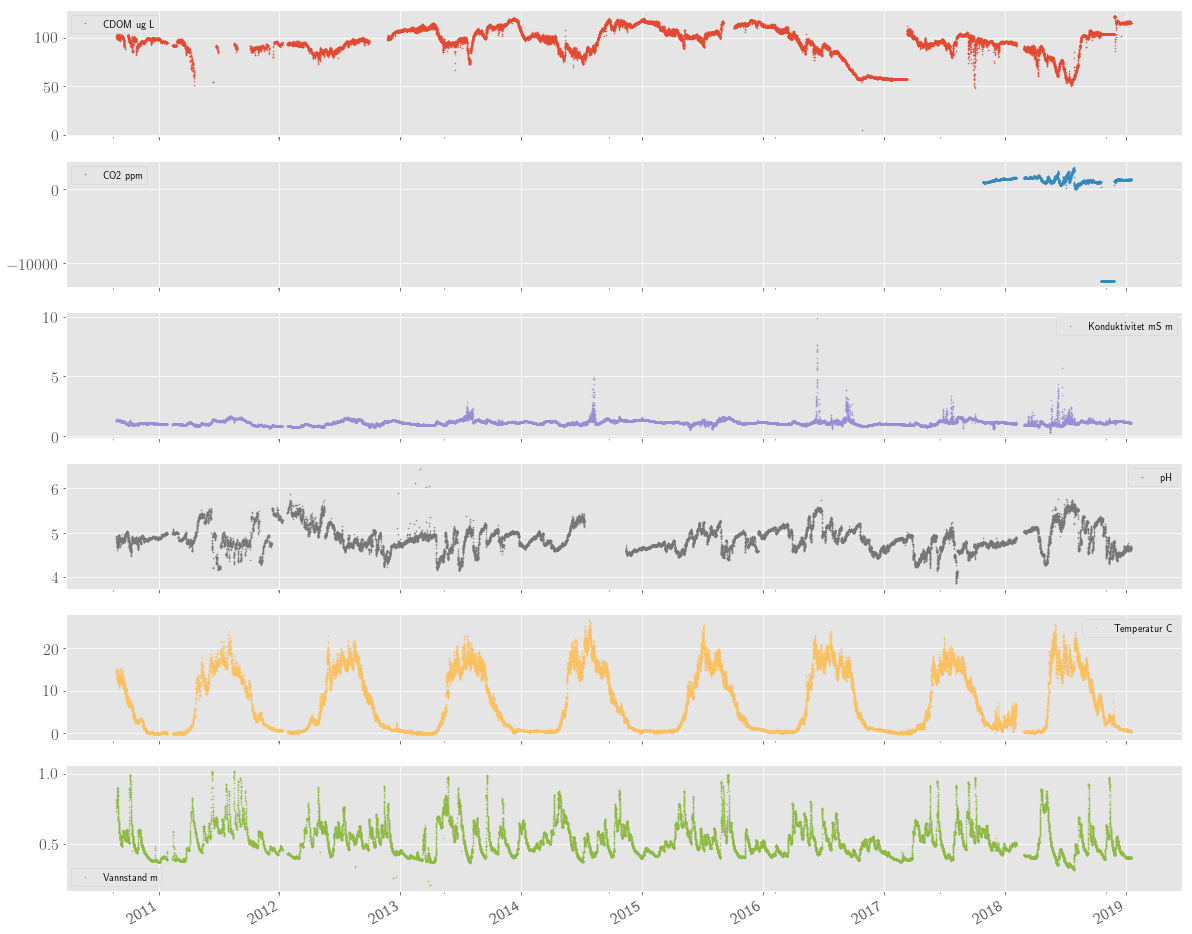

In [7]:
outlet.plot(subplots=True,figsize=(20,18),linestyle='None',marker='.',markersize=1)

## Getting O2 in lake

In [8]:
lake = lw.getLangtjernData(username,password,root,fromDate,toDate, 50472, 'Water')
lake.drop(['Depth2','ProjectId', 'ProjectName', 'StationId', 'StationCode',
             'StationName','SampleDate_dato', 'SampleDate_tid'], inplace=True, axis=1) 
lake.replace('< 1','Null')
lake = lake.rename(columns=lambda x: re.sub('[_/]',' ',x))
lake = lake.rename(columns=lambda x: re.sub('µ','u',x))
print("The data that were read are: {}".format(lake.columns))

/home/jose-luis/Envs/prognos_get_data_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


The data that were read are: Index(['Depth1', 'O2 (metning) %', 'Temperatur C'], dtype='object')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad0e7a3828>],
      dtype=object)

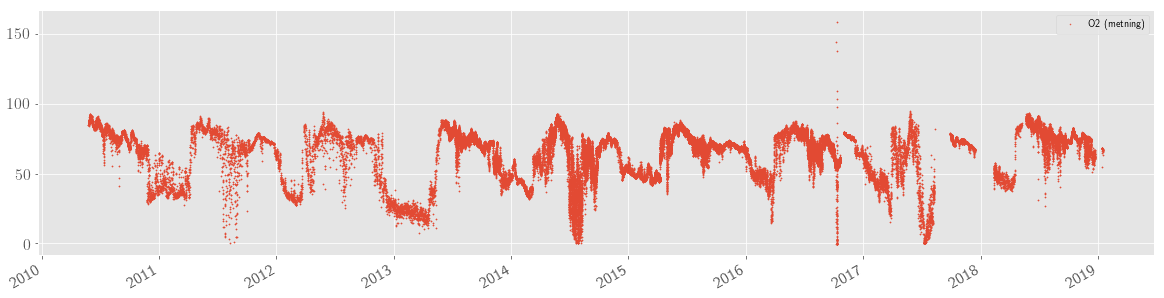

In [9]:
#Getting O2 at 1m depth
O2 = lake[lake['Depth1']==1.0]
O2.drop(['Depth1', 'Temperatur C'],inplace=True,axis=1)
O2.plot(subplots=True,figsize=(20,5),linestyle='None',marker='.',markersize=1)

## Getting radiation

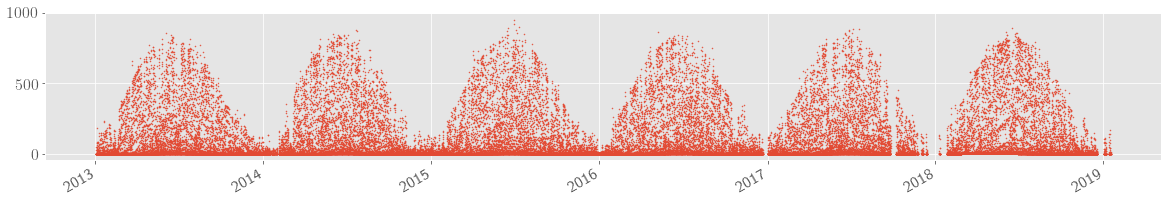

In [10]:
radiation = lw.getLangtjernData(username,password,root,fromDate,toDate, 62040, 'Air')
radiation = radiation['Globalstråling_W/m2']
radiation.columns = ['radiation']
radiation = radiation.astype('float64')
radiation.plot(figsize=(20,3),marker='.',markersize=1,linestyle='')

## Finding relation between CDOM, TOC, and conductivity at the outlet, concentration of 02 in the lake, and radiation near the lake. 

### Interpolating data to the same timeframe as the TOC

Index(['CDOM', 'Conductivity', 'O2', 'TOC', 'Temperature', 'gh', 'radiation'], dtype='object')

,CDOM,Conductivity,O2,TOC,Temperature,gh,radiation
2013-05-05 14:33:00,98.657500,1.025075,35.826625,8.4,4.046250,0.622142,564.182415
2013-05-12 00:00:00,91.100000,0.911000,59.410000,9.0,4.494000,0.714200,0.255410
2013-05-19 15:38:00,93.448333,1.182367,78.006000,8.9,12.904667,0.846227,363.888850
2013-05-26 13:55:00,92.545833,1.282708,86.982292,9.4,17.055417,0.687383,657.075467
2013-06-03 12:33:00,94.755000,1.229825,86.035250,10.3,13.269250,0.691475,608.961340
2013-06-09 13:47:00,94.200000,1.157217,87.397417,10.1,14.640833,0.570052,430.384032
2013-06-16 13:55:00,93.112500,1.197750,82.742500,9.9,17.194167,0.624329,537.361742
2013-06-23 16:12:00,97.760000,1.255500,79.944000,10.4,16.192000,0.832490,237.368660
2013-06-30 13:39:00,92.775000,1.365850,76.447500,11.5,14.467500,0.769570,291.154215
2013-07-07 10:15:00,97.087500,1.422625,85.730000,11.4,18.342500,0.592562,689.398800


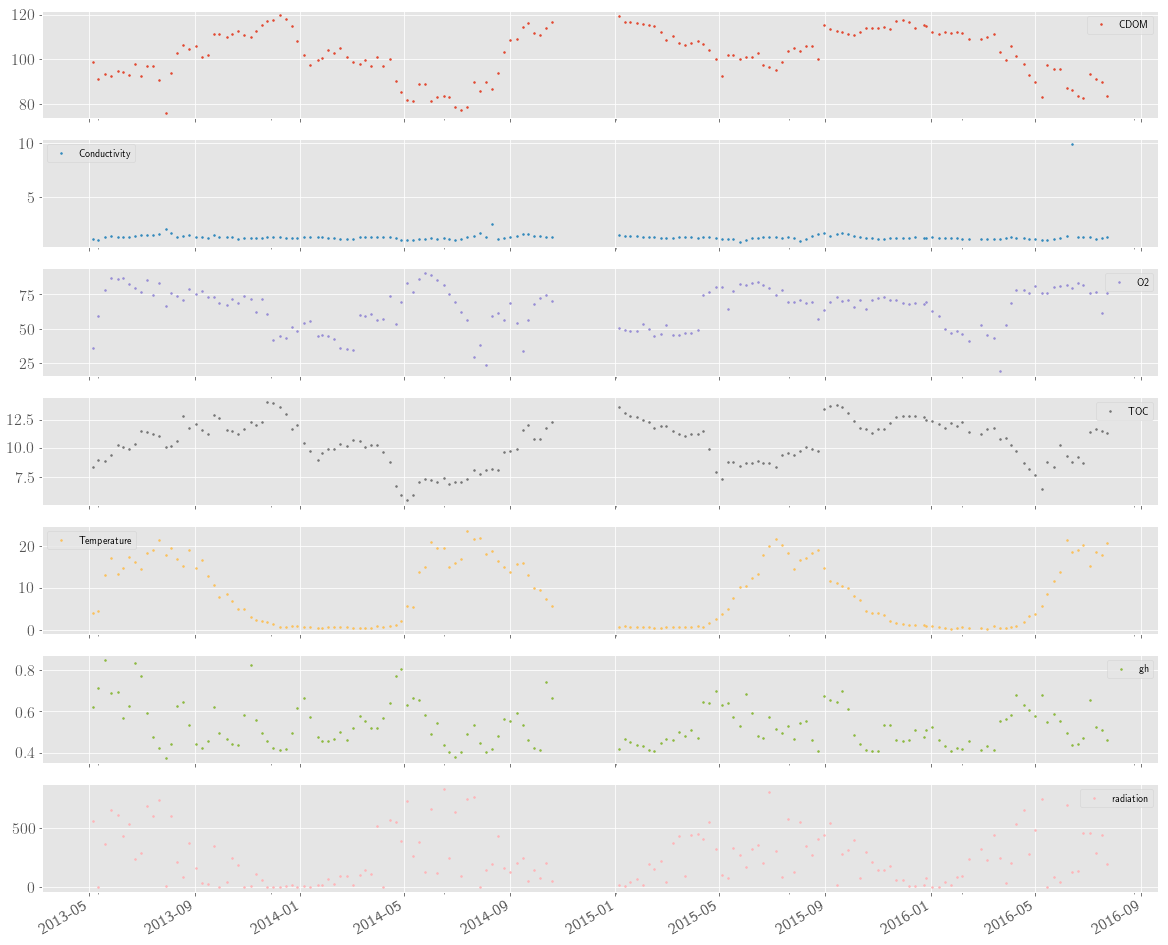

In [21]:
C = TOC.copy()
C = C.dropna().to_frame()
C = C[~C.index.duplicated(keep='first')]
C.rename(columns={'TOC mg l':'TOC'},inplace=True)

oxy = O2.copy()
oxy = oxy.dropna()
oxy.rename(columns={'O2 (metning) %':'O2'},inplace=True)
oxy.interpolate(inplace=True,method='index')

out = outlet.copy()
# display(out)
out.drop(['CO2 ppm', 'pH'],inplace=True, axis=1)
out.rename(columns={'CDOM ug L' : 'CDOM','Temperatur C':'Temperature', 'Konduktivitet mS m':'Conductivity', 'Vannstand m': 'gh'},inplace=True)
out['Temperature'] = out['Temperature'].apply(lambda x : 0.0 if x < 0.0 else x)
out.interpolate(inplace=True,method='index')

rad=radiation.copy()
rad=rad.to_frame()
rad.rename(columns={'Globalstråling_W/m2':'radiation'},inplace=True)
rad.interpolate(inplace=True,method='index')

#display(rad,oxy,out)
data = rad.join(oxy)
data = data.join(out)
# display(data)
# data = pd.concat([rad,oxy,out],axis=1)
allData = data.copy()
data.interpolate(inplace=True,method='index')
# data.interpolate(inplace=True)
#data = data[np.isnan(data['TOC'])==False]
# lake[lake['Depth1']==1.0]

start = pd.to_datetime('2013-04-30')
finish = pd.to_datetime('2016-07-31')

# start = pd.to_datetime('2012-04-30')
# finish = pd.to_datetime('2018-12-31')

data = data.loc[start:finish,:]
C = C.loc[start:finish,:]

#data.interpolate(inplace=True,method='index')
data = pd.concat([data,C],axis=0,sort=True)
data.interpolate(inplace=True,method='index')
data = data.dropna()

data.plot(subplots=True,figsize=(20,18),marker='.',markersize=3,linestyle='')
display(data.columns)
display(data)


In [22]:
summer_start = pd.to_datetime('2018-05-11').timetuple().tm_yday
summer_end = pd.to_datetime('2018-11-14').timetuple().tm_yday
ordinal = np.array(data.index.dayofyear)
def is_summer(x) : 
    result = [True if summer_start <= i < summer_end else False for i in x] 
    return result
def is_winter(x) :
    return [True if i <= summer_start or i >= summer_end else False for i in x]

## Regression
### Winter

,CDOM,Conductivity,O2,TOC,Temperature,gh,radiation
2013-05-05 14:33:00,98.657500,1.025075,35.826625,8.4,4.046250,0.622142,564.182415
2013-11-17 14:14:00,115.218333,1.112417,71.592000,12.3,2.019900,0.496300,54.905566
2013-11-24 00:00:00,117.275000,1.170750,60.900000,14.0,1.881333,0.459500,0.255000
2013-12-01 00:00:00,117.700000,1.156000,41.450000,13.9,1.252000,0.422200,0.255580
2013-12-08 14:30:00,119.700000,1.165250,44.900000,13.6,0.669250,0.415475,2.483740
2013-12-15 14:17:00,118.157500,1.116575,42.903167,13.0,0.509917,0.417529,4.190342
2013-12-22 13:50:00,114.900000,1.054917,51.511667,11.7,0.945583,0.496567,20.332997
2013-12-28 00:00:00,108.300000,1.135000,48.140000,12.0,0.815000,0.615200,0.255540
2014-01-05 14:30:00,102.200000,1.178750,54.295000,10.5,0.686750,0.663350,4.698585
2014-01-12 00:00:00,97.500000,1.222000,55.700000,9.8,0.523000,0.571200,0.255100


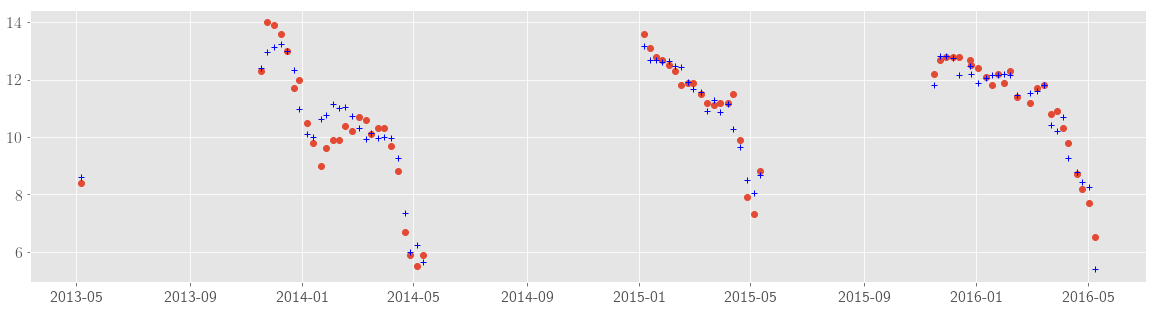

In [23]:
#Performing regression
winter_idx = is_winter(data.index.dayofyear)
y, X = dmatrices('TOC ~  0 + CDOM + Temperature + gh + radiation + Temperature:gh + Temperature:radiation', 
                 data=data.loc[winter_idx,:], return_type='dataframe')

# Note the difference in argument order
model = sm.OLS(y, X).fit()
model.summary()
#fig, ax = plt.subplots()
#fig = sm.graphics.plot_fit(model, 0, ax=ax)
ypred = model.predict(X)
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(X.index, y['TOC'], 'o', label="TOC")
ax.plot(X.index, ypred, 'b+', label="prediction")
# ax.plot(y['TOC'],ypred,'k.')
display(data.loc[winter_idx,:])

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TOC   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4502.
Date:                Thu, 23 May 2019   Prob (F-statistic):           4.16e-83
Time:                        16:16:17   Log-Likelihood:                -56.774
No. Observations:                  71   AIC:                             125.5
Df Residuals:                      65   BIC:                             139.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CDOM                      0.1172      0.005     23.397      0.000       0.107       0.127
Temperature               1.5392      0.633      2.432      0.018       0.275       2.803
gh                       -2.3864      1.045     -2.284      0.026      -4.473      -0.300
radiation                -0.0013      0.001     -2.460      0.017      -0.002      -0.000
Temperature:gh           -2.9651      1.041     -2.847      0.006      -5.045      -0.885
Temperature:radiation     0.0002      0.000      1.039      0.303      -0.000       0.001
==============================================================================
Omnibus:                        3.219   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.404
Skew:                          -0.346   Prob(JB):                        0.301
Kurtosis:                       3.578   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

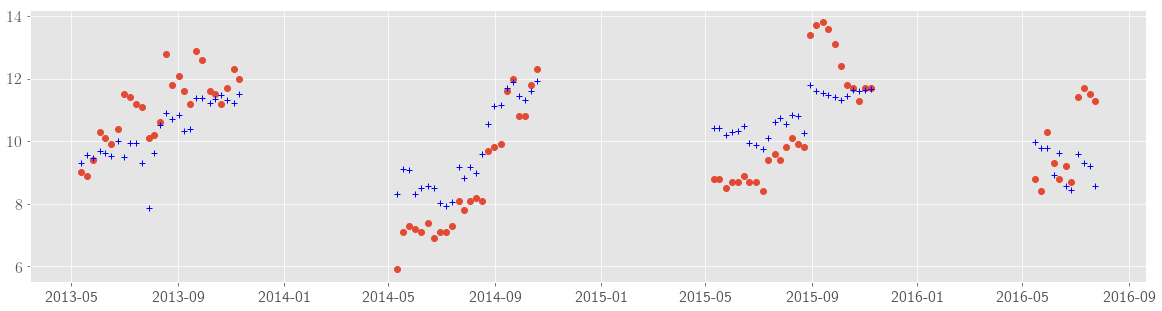

In [25]:
### Summer
#Performing regression
summer_idx = is_summer(data.index.dayofyear)
y, X = dmatrices('TOC ~ CDOM + Conductivity - 1', data=data.loc[summer_idx,:], return_type='dataframe')

# Note the difference in argument order
model_summer = sm.OLS(y, X).fit()
#fig, ax = plt.subplots()
#fig = sm.graphics.plot_fit(model, 0, ax=ax)
ypred = model_summer.predict(X)
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(X.index, y['TOC'], 'o', label="TOC")
ax.plot(X.index, ypred, 'b+', label="prediction")
#ax.plot(y.TOC,ypred,linestyle='None',marker='.')

In [26]:
model_summer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TOC   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2921.
Date:                Thu, 23 May 2019   Prob (F-statistic):           1.74e-80
Time:                        16:16:19   Log-Likelihood:                -146.04
No. Observations:                  89   AIC:                             296.1
Df Residuals:                      87   BIC:                             301.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CDOM             0.1011      0.002     45.831      0.000       0.097       0.105
Conductivity     0.0896      0.137      0.652      0.516      -0.183       0.362
==============================================================================
Omnibus:                        9.468   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                4.802
Skew:                           0.355   Prob(JB):                       0.0906
Kurtosis:                       2.111   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Transforming  high-frequency CDOM to TOC

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facf5d04f98>,
      dtype=object)

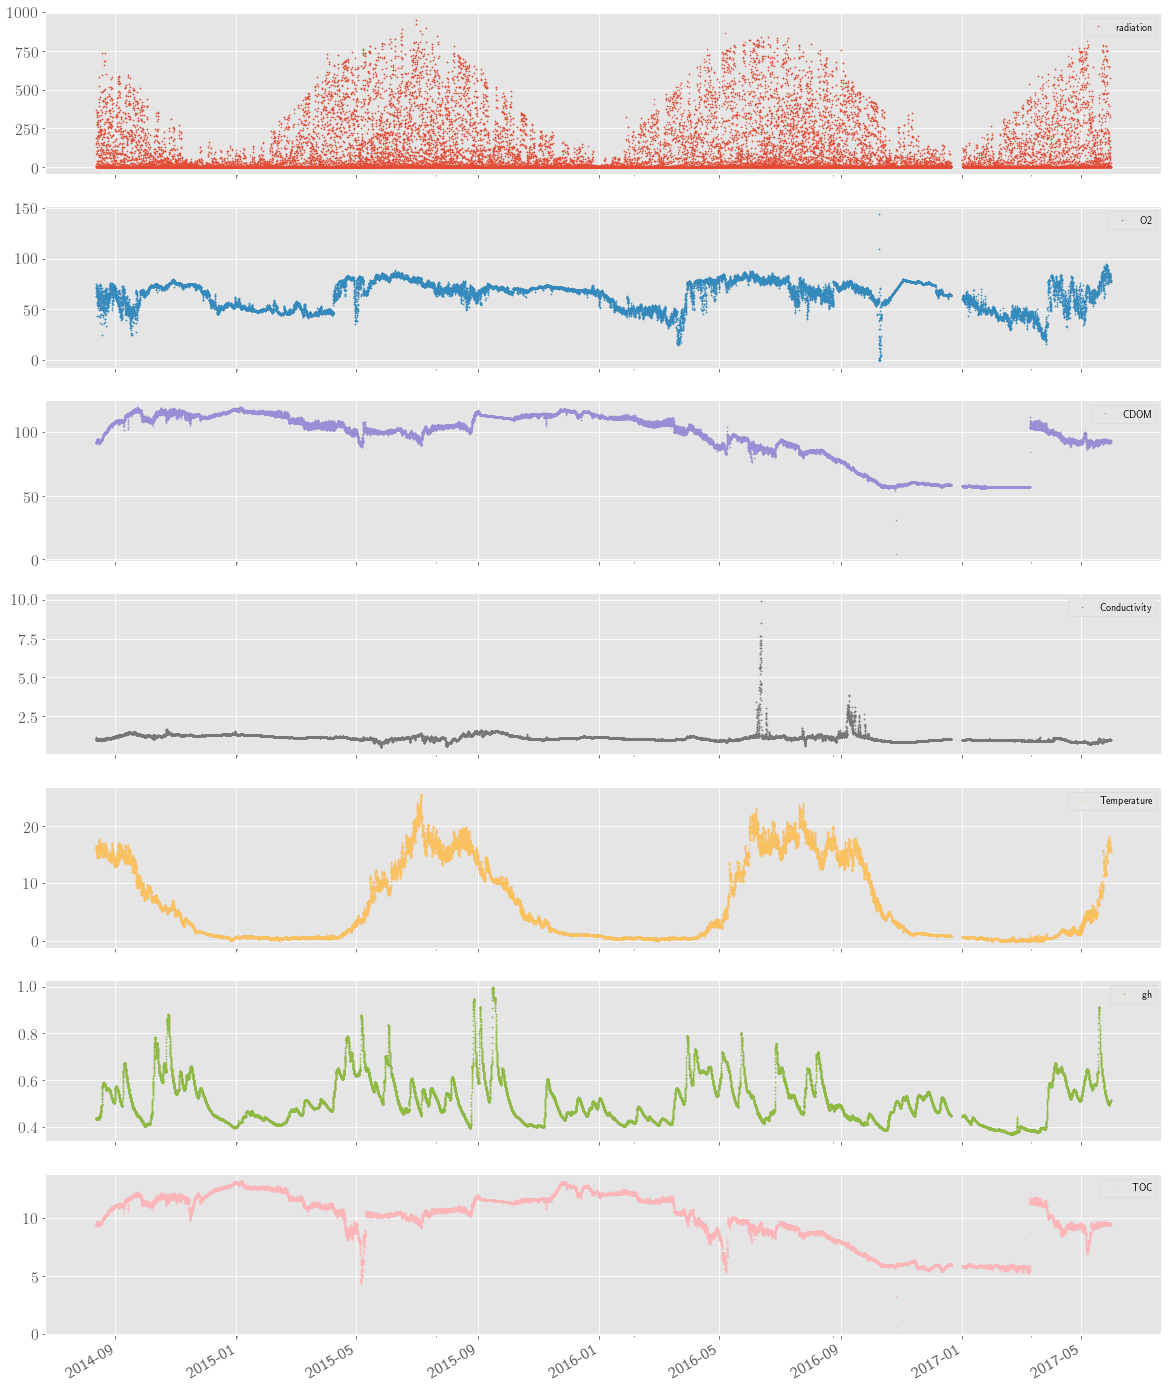

In [27]:
start = pd.to_datetime('2014-08-12 14:00:00')
finish = pd.to_datetime('2017-05-31 00:00:00')
allData = allData[start:finish]

allData.interpolate(method='time',inplace=True)

allData['summer'] = is_summer(allData.index.dayofyear)
allData['winter'] = is_winter(allData.index.dayofyear)

def TOC(row) :
    if row.summer: 
        return float(model_summer.predict([row.CDOM, row.Conductivity]))
    return float(model.predict([row.CDOM,
                                row.Temperature,
                                row.gh,
                                row.radiation,
                                row.Temperature*row.gh,
                                row.Temperature*row.radiation]
                              )
                )

allData['TOC'] = allData.apply(lambda x: TOC(x), axis = 1)

to_string_values_acpy = lambda t,depth,val :  i.strftime('%Y-%m-%d %H:%M:%S') + '\t' + \
                                              '-' + str(depth) + '\t' + str(val) + '\n'

filename = './results/TOC_outlet.obs'
fid = open(filename,'w')

for i,x in allData.TOC.items():
    fid.write(to_string_values_acpy(i,0.0,x))
fid.close()

allData.plot(subplots=True, figsize=(20,3*len(allData.columns) ), marker='.', markersize=1, linestyle='None')